
========================================================<br>
<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-09-30<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

**Connect and authorize google drive with google colab:**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [3]:
%cd gdrive/My\ Drive/TensorFlow-2.x-YOLOv3/
!ls

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3
CAPTCHA_solver_v3.h5  IMAGES		 __pycache__
checkpoints	      log		 requirements.txt
custom_dataset	      mAP		 save_program_screen.py
deep_sort	      mnist		 tools
detection_custom.py   model_data	 train.py
detection_demo.py     mp_test.py	 yolov3
detect_mnist.py       multiprc.py	 YOLOv3_colab_training.ipynb
evaluate_mAP.py       object_tracker.py


**Install all required libraries for our project:**

In [ ]:
!pip install -r ./requirements.txt

**Download yolov3.weights if you don't have it:**

In [ ]:
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.3.0
'/device:GPU:0'
```

In [3]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.7.0


''

**Test by loading trained model:**

In [1]:
import pandas as pd

In [13]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, image_preprocess, postprocess_boxes, nms, draw_bbox
from yolov3.configs import *

if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

In [14]:
def detect_image(Yolo, image_path, output_path, input_size=416, show=False, CLASSES=YOLO_COCO_CLASSES, score_threshold=0.3, iou_threshold=0.45, rectangle_colors=''):
    original_image      = cv2.imread(image_path)
    original_image      = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    original_image      = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    image_data = image_preprocess(np.copy(original_image), [input_size, input_size])
    image_data = image_data[np.newaxis, ...].astype(np.float32)

    if YOLO_FRAMEWORK == "tf":
        pred_bbox = Yolo.predict(image_data)
    elif YOLO_FRAMEWORK == "trt":
        batched_input = tf.constant(image_data)
        result = Yolo(batched_input)
        pred_bbox = []
        for key, value in result.items():
            value = value.numpy()
            pred_bbox.append(value)
        
    pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
    pred_bbox = tf.concat(pred_bbox, axis=0)
    
    bboxes = postprocess_boxes(pred_bbox, original_image, input_size, score_threshold)
    bboxes = nms(bboxes, iou_threshold, method='nms')

    image = draw_bbox(original_image, bboxes, CLASSES=CLASSES, rectangle_colors=rectangle_colors)
    # CreateXMLfile("XML_Detections", str(int(time.time())), original_image, bboxes, read_class_names(CLASSES))

    if output_path != '': cv2.imwrite(output_path, image)
    if show:
        # Show the image
        cv2.imshow("predicted image", image)
        # Load and hold the image
        cv2.waitKey(0)
        # To close the window after the required kill value was provided
        cv2.destroyAllWindows()
        
    return image, bboxes

**Test by testing detection on original model:**

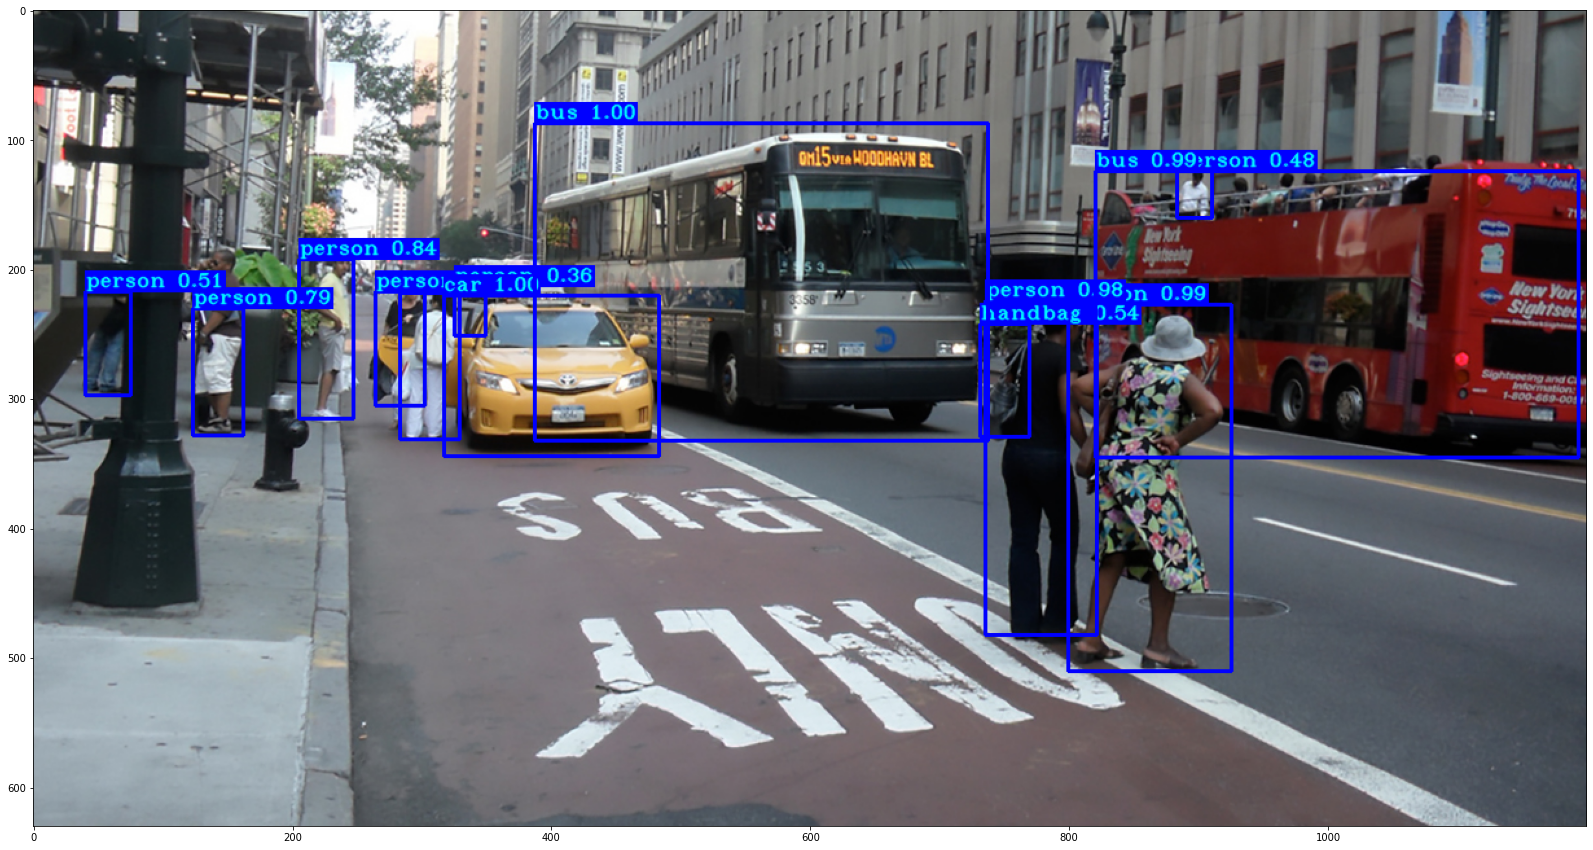

In [15]:
image_path   = "./IMAGES/street.jpg"

image, _ = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

In [16]:
_, bboxes = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))

In [19]:
bboxes

[array([799.37060547, 227.99557495, 925.76831055, 510.58648682,
          0.99313611,   0.        ]),
 array([735.45581055, 224.04570007, 821.09283447, 482.39501953,
          0.97669119,   0.        ]),
 array([283.4649353 , 218.67912292, 329.65527344, 331.49197388,
          0.9417761 ,   0.        ]),
 array([205.15568542, 192.52619934, 247.02235413, 315.4921875 ,
          0.83876055,   0.        ]),
 array([123.47553253, 230.06991577, 162.92889404, 328.40344238,
          0.79248786,   0.        ]),
 array([ 40.3826828 , 217.65350342,  75.40582275, 297.01828003,
          0.508026  ,   0.        ]),
 array([8.83833801e+02, 1.24376991e+02, 9.10602600e+02, 1.60007721e+02,
        4.83874023e-01, 0.00000000e+00]),
 array([264.14825439, 217.39848328, 302.21807861, 305.56304932,
          0.47895578,   0.        ]),
 array([325.00540161, 213.70503235, 349.57550049, 251.25115967,
          0.35620356,   0.        ]),
 array([7.31281982e+02, 2.42279434e+02, 7.69043335e+02, 3.29996643e+02

**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files:**

In [5]:
!python tools/XML_to_YOLOv3.py

/Users/nicholasutikal/Documents/private_code/DS/YOLOv3/custom_dataset/train
/Users/nicholasutikal/Documents/private_code/DS/YOLOv3/custom_dataset/test
Dataset_names: []


**Start training custom model:**

In [6]:
from train import *
tf.keras.backend.clear_session()
main()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10930612629773879241
xla_global_id: -1
]
GPUs []


FileNotFoundError: [Errno 2] No such file or directory: 'mnist/mnist_train.txt'

**Create Yolo v3 custom model and load custom trained weights**

In [8]:
yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

**Test the detection with `IMAGES/plate_2.jpg` image**

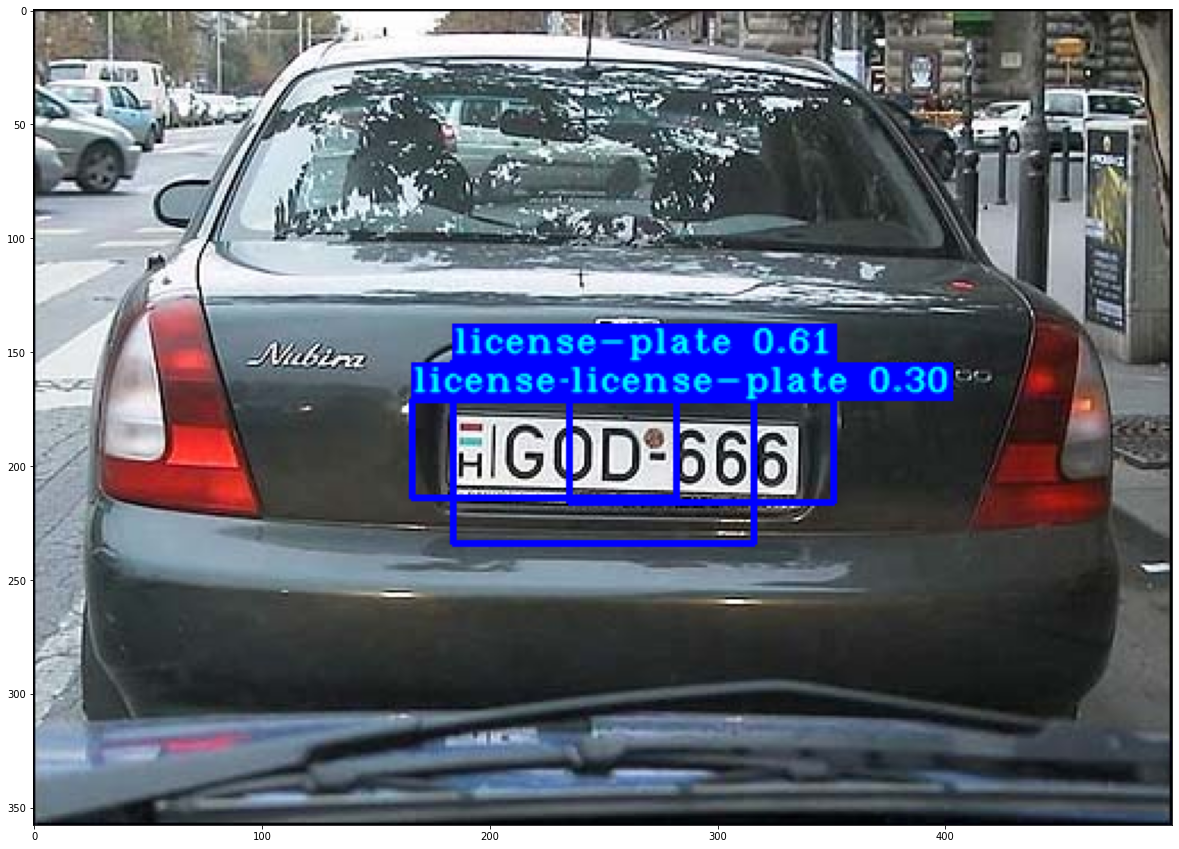

In [9]:
image_path   = "./IMAGES/plate_1.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

# **You just trained your first Yolo v3 custom object detector on google colab, GOOD JOB!!**